# Análise exploratória dos tweets e dos dados econômicos

In [1]:
import pandas as pd
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Dados econômicos
### Validez dos dados

In [2]:
## economic_data = pd.read_csv("..\\data\\economic_time_series.csv", sep=";")
## economic_data = pd.read_csv("data/economic_time_series.csv", sep=";", index_col=0)
economic_data = pd.read_csv("../../data/economic_data/economic_time_series.csv", sep=";", index_col=0)

C:\Users\tomas\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


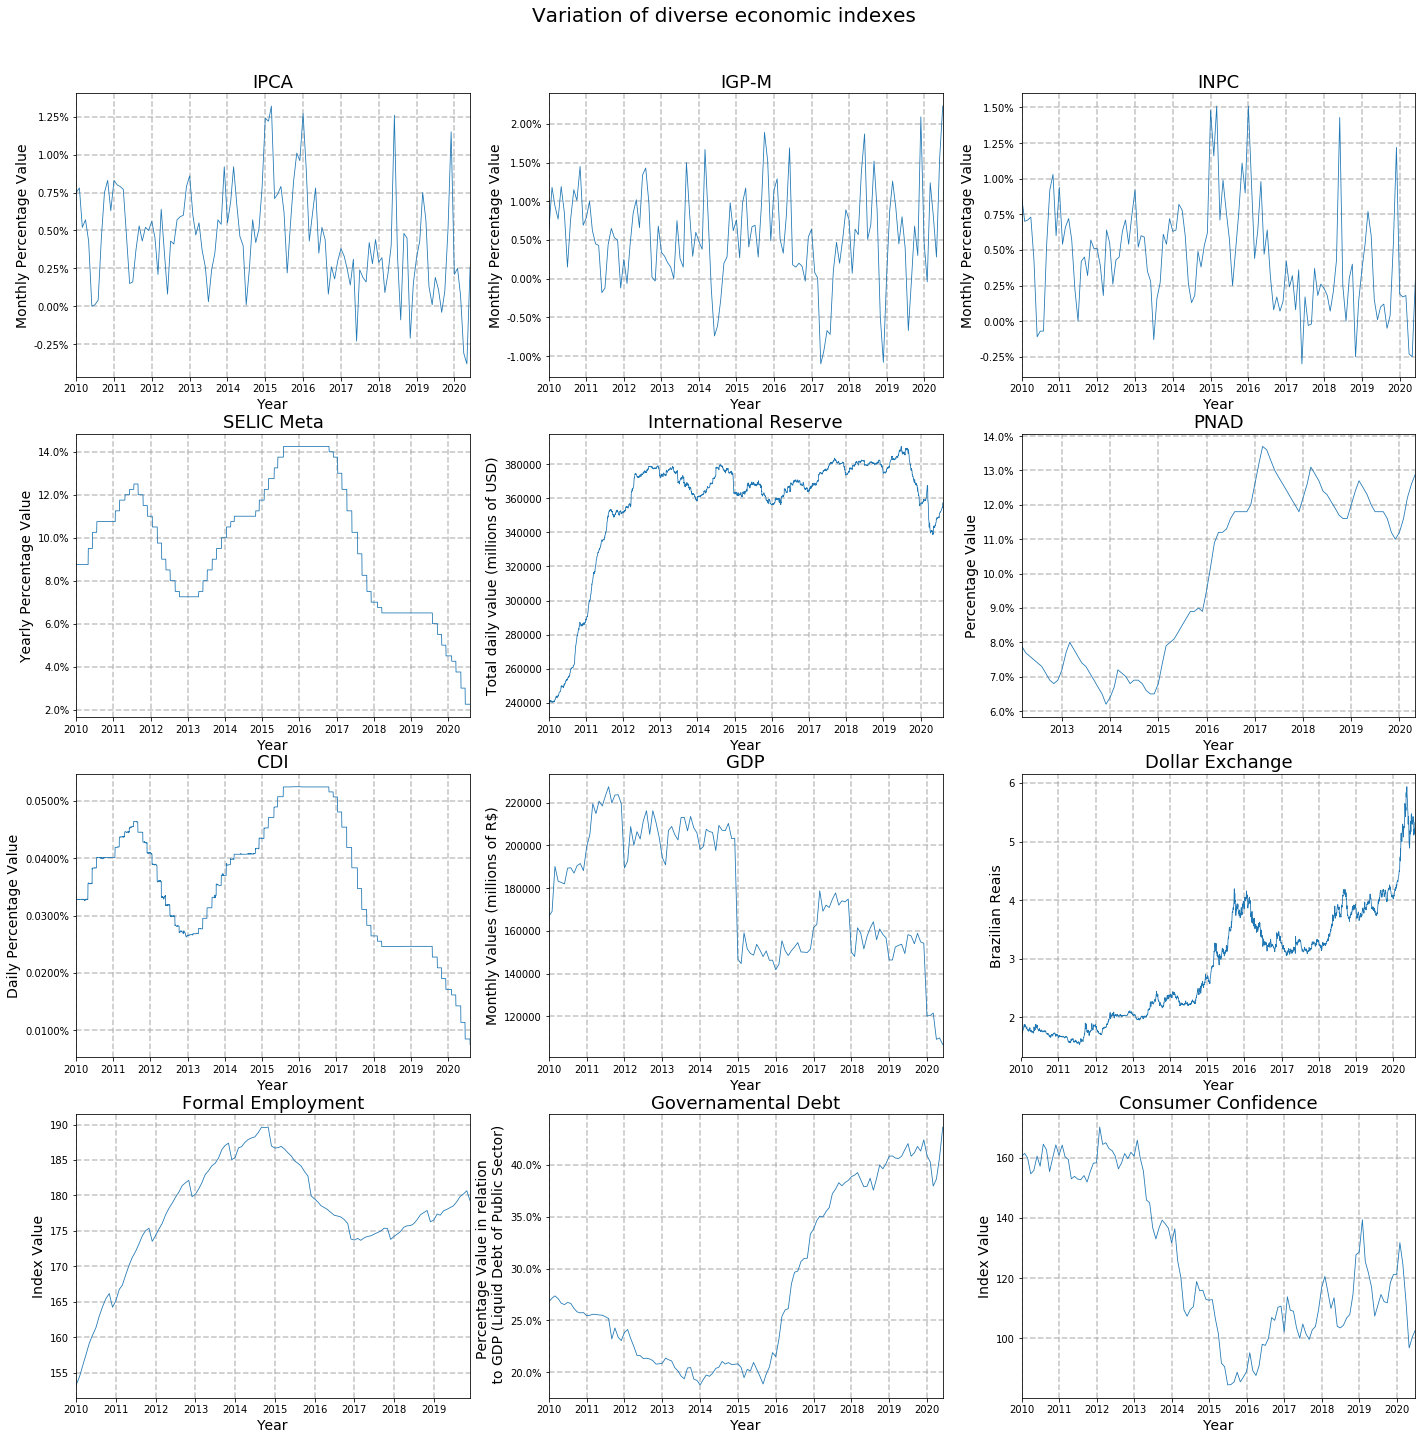

In [3]:
# Useful parameters for the code
initialDate = '2010-01-01'
indices = list(economic_data.columns)
nColumn = 3
nRows = int(len(indices)/nColumn)

# Y Label, Graph title
dicTitles = {'ipca':['Monthly Percentage Value','IPCA'],
 'igpm':['Monthly Percentage Value','IGP-M'],
 'inpc':['Monthly Percentage Value','INPC'],
 'selic_meta':['Yearly Percentage Value','SELIC Meta'],
 'international_reserve':['Total daily value (millions of USD)','International Reserve'],
 'pnad':['Percentage Value','PNAD'],
 'cdi':['Daily Percentage Value','CDI'],
 'gdp':['Monthly Values (millions of R$)','GDP'],
 'dollar':['Brazilian Reais','Dollar Exchange'],
 'employment':['Index Value','Formal Employment'],
 'gov_debt':['Percentage Value in relation \n to GDP (Liquid Debt of Public Sector)','Governamental Debt'],
 'consumer_confidence':['Index Value','Consumer Confidence']
}

# Plot
fig, ax = plt.subplots(nRows, nColumn, figsize=(8*nColumn,6*nRows))

for i in range(0,len(indices)):
    # Getting the info
    allValues = np.array(economic_data[indices[i]])
    ind = ~np.isnan(allValues) & (np.array(economic_data.index)>=initialDate)
    seriesValues = allValues[ind]
    dateValues = pd.to_datetime(economic_data.index[ind])
    
    # Plotting and formatting
    ax[int(i/nColumn)][i%nColumn].plot(dateValues, seriesValues, lw=0.8)
    
    # Set axes limits
    ax[int(i/nColumn)][i%nColumn].set_xlim(dateValues.min(), dateValues.max())

    # Make labels
    ax[int(i/nColumn)][i%nColumn].set_xlabel('Year', fontsize=14)
    if 'Percentage Value' in dicTitles[indices[i]][0]:
        ax[int(i/nColumn)][i%nColumn].set_ylabel(dicTitles[indices[i]][0], fontsize=14)
        ax[int(i/nColumn)][i%nColumn].yaxis.set_major_formatter(PercentFormatter(100))
    else:
        ax[int(i/nColumn)][i%nColumn].set_ylabel(dicTitles[indices[i]][0], fontsize=14)
        
    ax[int(i/nColumn)][i%nColumn].set_title(dicTitles[indices[i]][1], fontsize=18)
    
    # Grid
    ax[int(i/nColumn)][i%nColumn].grid(True, lw=1.5, ls='--', alpha=0.75)
    
# Overall title
plt.suptitle("Variation of diverse economic indexes",x=0.5, y=0.93,verticalalignment='top', fontsize = 20)
plt.savefig('images/figure1.pdf')
plt.show()

<HR>
A variável abaixo foi criada com o intuito de se encaixar em uma visualização, mas não conseguimos encontrar algum jeito interessante de informar os resultados.
<HR>

In [4]:
importantDates = {'2013 FIFA Confederations Cup':['2013-06-15','2013-06-30'], # soccer related
                 '2014 World Cup':['2014-06-12','2014-07-13'],
                 '2016 Summer Olympics ':['2016-08-05','2016-08-21'],
                 '2019 America\'s cup':['2019-06-14','2019-07-07'],
                 'Mariana dam disaster':['2015-11-05','2015-11-22'], # disasters related
                 'Brumadinho dam disaster':['2019-01-25','2019-01-30'],
                 'Protests against bus fares':['2013-06-11','2013-06-19'], # politicals things 16 de maio de 2014
                 '2014 Brazilian economic crisis':['2014-05-16','2016-09-01'],
                 'Impeachment of Dilma Rousseff':['2016-08-24','2016-08-31'],
                 'Petrobras investigation through Operation Car Wash':['2014-03-01','2017-04-01'],
                 'New president':['2019-01-01','2019-02-01'],
                 '2019 Northeast Brazil oil spill':['2019-08-30','2019-10-31'],
                 'Covid Pandemic':['2020-02-03','2020-06-08'] # current state of things
                 } 

for key in importantDates.keys():
    importantDates[key] = [pd.to_datetime(date) for date in importantDates[key]]

### Análise de correlação

In [5]:
## we remove days before 2010 for our analisys
economic_data.index = pd.to_datetime(economic_data.index)
economic_data["year"] = pd.DatetimeIndex(economic_data.index).year
economic_data = economic_data[economic_data.year >= 2010]

# remove the NaN lines for simplicity
clean_economic_data = economic_data.dropna()
economic_features = clean_economic_data.columns

# rescale the data to better visualization
scaler = StandardScaler().fit(clean_economic_data)

scaled_economic_data = scaler.transform(clean_economic_data)
scaled_economic_data = pd.DataFrame(scaled_economic_data,
                                    columns=economic_features)

C:\Users\tomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


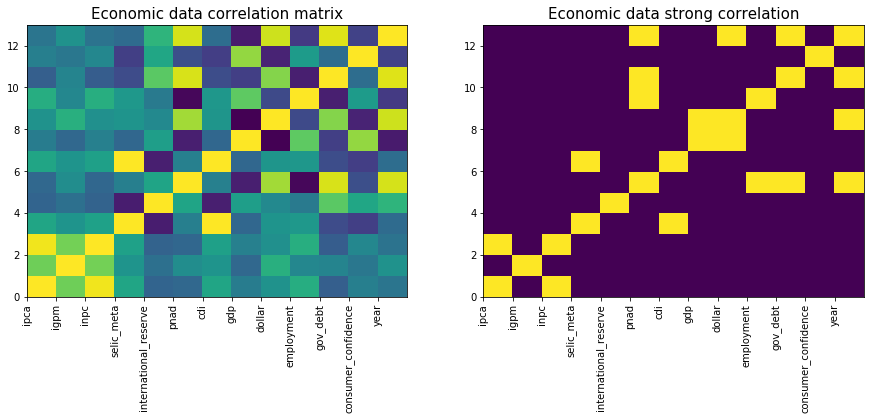

In [6]:
## plot the data to show correlation
corr_mat = np.corrcoef(scaled_economic_data.T)
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_xticks(range(len(scaled_economic_data.columns)))
ax[0].set_xticklabels(scaled_economic_data.columns, rotation="vertical")
ax[0].pcolor(corr_mat)
ax[0].set_title("Economic data correlation matrix", fontsize=15)

ax[1].set_xticks(range(len(scaled_economic_data.columns)))
ax[1].set_xticklabels(scaled_economic_data.columns, rotation='vertical')
ax[1].pcolor(abs(corr_mat) > 0.8)
ax[1].set_title("Economic data strong correlation", fontsize=15)

plt.savefig('images/figure2.pdf')
plt.show()

Muitos dados apresentados são fortemente correlacionados, o que se é de esperar: flutuações em fatores econômicos globais influenciam de maneira semelhante índices semelhantes no mercado.

Algumas variáveis possuem também comportamentos opostos, ou *negativamente correlacinados*. Para fins de primeira análise, removemos as variáveis correlacionadas, evitando acúmulo de informação repetida.

In [7]:
# we remove strongly correlated features

to_remove = []
for col_i in range(len(economic_features)):
  for col_j in range(col_i+1, len(economic_features)):
    # if a feature is already to remove, go ahead
    if economic_features[col_j] in to_remove: continue

    # if a feature is correlated to a preceding, remove it
    if abs(corr_mat[col_i,col_j]) > 0.8 :
      to_remove.append(economic_features[col_j])

# print obtained results
print("From {} indexes, remove {} of them".format(
    len(economic_features), len(to_remove)))
print("Remove: ", to_remove)

From 13 indexes, remove 6 of them
Remove:  ['inpc', 'cdi', 'employment', 'gov_debt', 'year', 'dollar']


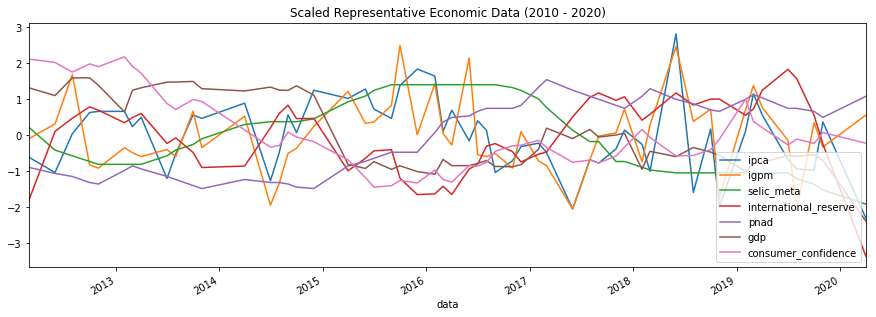

In [8]:
# use the simplified version of the data
simp_economic_data = economic_data.drop(to_remove, axis=1)

# remove the NaN lines for simplicity
clean_economic_data = simp_economic_data.dropna()
economic_features = clean_economic_data.columns

# rescale the data to better visualization
scaler = StandardScaler().fit(clean_economic_data)
scaled_economic_data = clean_economic_data.copy()
scaled_economic_data[economic_features] = scaler.transform(clean_economic_data)
scaled_economic_data = pd.DataFrame(scaled_economic_data)
scaled_economic_data.columns = economic_features

# plotamos os dados representativos
g = scaled_economic_data.plot(figsize=(15,5))
g.set_title("Scaled Representative Economic Data (2010 - 2020)")
plt.savefig('images/figure3.pdf')

Resumimos o conjunto de variáveis inicial a 7 representativas, a partir das quais podemos analisar as tendencias do mercado, e considerar impactos de eventos econômicos relevantes em certos períodos como a crise de 2014 e a eleição de Donald Trump em 2016.

## Análise de texto do Twitter

Desejamos fazer uma primeira análise do conteúdos dos Tweets da família Bolsonaro, além da análise quantitativa.

In [9]:
# tweeys_data = pd.read_csv("..\\data\\preprocessed_tweets.csv", sep="~")
# tweeys_data = pd.read_csv("data/preprocessed_tweets.csv", sep="~", index_col=0)
tweeys_data = pd.read_csv("../../data/tweets/preprocessed_tweets.csv", sep="~", index_col=0)
tweeys_data["date"] = pd.to_datetime(tweeys_data["date"])
tweeys_data.set_index("date", inplace=True)

C:\Users\tomas\Anaconda3\lib\site-packages\seaborn\relational.py:915: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


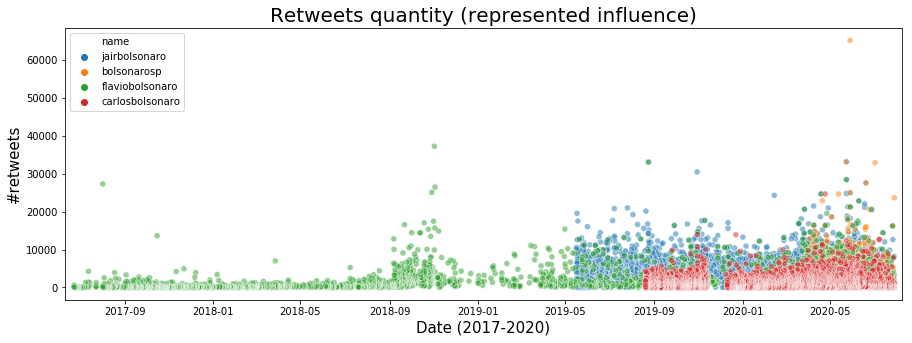

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(x = tweeys_data.index, y = "retweet_count",
                data=tweeys_data, hue="name", alpha=0.5, ax=ax)

ax.set_xlabel("Date (2017-2020)", fontsize=15)
ax.set_ylabel("#retweets", fontsize=15)
ax.set_title("Retweets quantity (represented influence)", fontsize=20)
ax.set_xlim('2017-06-10', '2020-08-07')

plt.savefig('images/figure4.pdf')
plt.show()

## Discussão de séries temporais: tweets e dados econômicos

Levantamos alguns questionamentos das séries com relação alguns eventos econômicos que podem representar impactos relevantes, assim como a relação de influencia/correlação dos tweets com o mercado.

* Quais eventos entre 2010 e 2020 explicam impactos, ou comportamentos externos nos dados?
* Esses impactos devem ser removidos, ou o mais adequado é mantê-los em análise como explicadores de eventuais correlações com os tweets?
* Como podemos relacionar termos mais frequentes e um período com os fatos econômicos apresentados? Quando termos são anteriores às notícias deveículos importantes no mesmo período, isso prediz impacto dos tweets na economia?

Resumo de algumas notícias na útimas década: https://pt.wikipedia.org/wiki/D%C3%A9cada_de_2010#Cronologia_de_eventos

In [11]:
monthly_tweeys_data = tweeys_data.groupby(['year','month','name']).agg({
    'name': len
})
monthly_tweeys_data.columns = ['numberOfTweets']

economic_data['month'] =economic_data.index.month
monthly_economic_data = economic_data.groupby(['year','month']).agg({
    'ipca': np.mean,
    'igpm': np.mean,
    'inpc': np.mean,
    'selic_meta': np.mean,
    'international_reserve': np.mean,
    'pnad': np.mean,
    'cdi': np.mean,
    'gdp': np.mean,
    'dollar': np.mean,
    'employment': np.mean,
    'gov_debt': np.mean,
    'consumer_confidence': np.mean
})

monthly_tweeys_data = monthly_tweeys_data.reset_index()
monthly_economic_data = monthly_economic_data.reset_index()

monthly_tweeys_data['date'] = [pd.datetime(year=monthly_tweeys_data.iloc[i,0], month=monthly_tweeys_data.iloc[i,1], day=1) 
                               for i in range(0,len(monthly_tweeys_data))]
monthly_economic_data['date'] = [pd.datetime(year=monthly_economic_data.iloc[i,0], month=monthly_economic_data.iloc[i,1], day=1) 
                               for i in range(0,len(monthly_economic_data))]

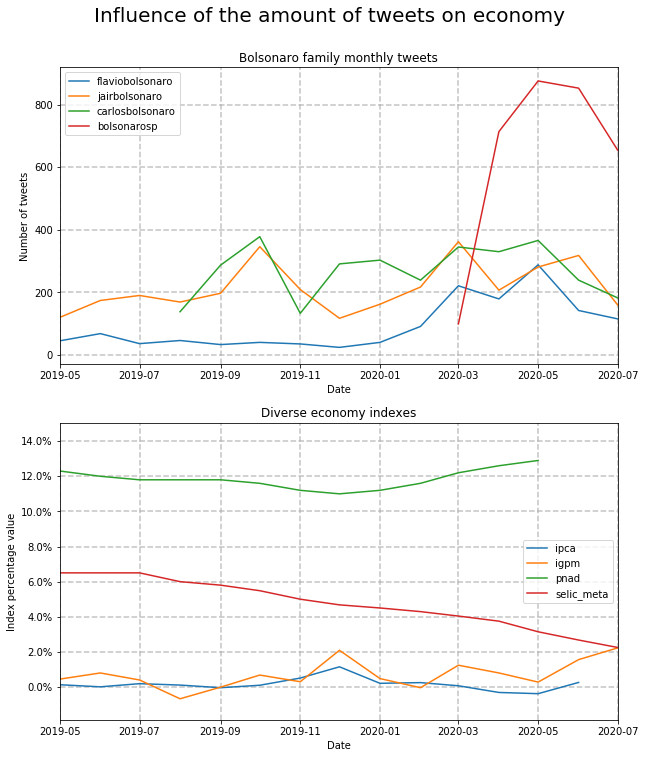

In [12]:
names = monthly_tweeys_data['name'].unique()
economyIndexesPercentageBased = ['ipca','igpm','pnad','selic_meta']

# Plot
fig, ax = plt.subplots(2, 1, figsize=(10,12))

# Getting the info and plotting
for name in names:
    ax[0].plot(monthly_tweeys_data['date'].loc[monthly_tweeys_data['name']==name], 
            monthly_tweeys_data['numberOfTweets'].loc[monthly_tweeys_data['name']==name], 
            label=name)

# Aesthetics stuff
ax[0].set_xlim('2019-05-01','2020-07-01')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of tweets')
ax[0].set_title('Bolsonaro family monthly tweets')
ax[0].grid(True, lw=1.5, ls='--', alpha=0.75)
ax[0].legend()

# Getting the info and plotting
for ecoIndex in economyIndexesPercentageBased:
    ind = ~np.isnan(monthly_economic_data[ecoIndex])
    ax[1].plot(monthly_economic_data['date'][ind], 
            monthly_economic_data[ecoIndex][ind], 
            label=ecoIndex)

# Aesthetics stuff
ax[1].set_xlim('2019-05-01','2020-07-01')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Index percentage value')
ax[1].set_title('Diverse economy indexes')
ax[1].grid(True, lw=1.5, ls='--', alpha=0.75)
ax[1].yaxis.set_major_formatter(PercentFormatter(100))
ax[1].legend()
    
# Overall title
plt.suptitle("Influence of the amount of tweets on economy",x=0.5, y=0.95,verticalalignment='top', fontsize = 20)
plt.savefig('images/figure5.pdf')
plt.show()

## Nuvem de palavras

Desejamos analisar quais os principais assuntos presentes no tweets do perfil do Jair Bolsonaro e também analisar como esses tópicos se alteraram ao longo do tempo, para isso, produziremos nuvens de palavras. Para realizar a visualização de nuvem de palavras utilizaremos a biblioteca __wordcloud__ e a partir dos dados dos tweets do Bolsonaro executaremos uma limpeza para adequar os dados para a biblioteca, para isso é necessário a biblioteca __nltk__ com seu conjunto de _stopwords_ para que não sejam consideradas na visualização.

In [4]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giova\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tweet_df = pd.read_csv("preprocessed_tweets.csv", sep = "~").drop(columns = ["Unnamed: 0"])
bolsonaro_df = tweet_df[tweet_df.name == "jairbolsonaro"]
print("O tweet mais antigo é de ", bolsonaro_df.date.min())
print("O tweet mais recente é de ", bolsonaro_df.date.max())

O tweet mais antigo é de  2019-05-16 17:22:36+00:00
O tweet mais recente é de  2020-07-27 20:51:13+00:00


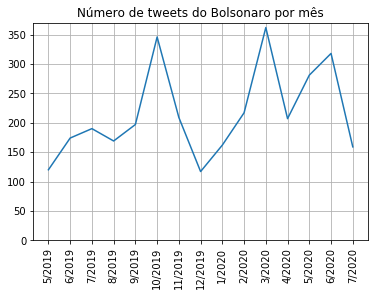

In [8]:
plot_data = bolsonaro_df.groupby(by = ["year", "month"]).count().reset_index()
plot_data["year-monthly"] = plot_data.month.apply(str) + "/" + plot_data.year.apply(str)
plt.plot(plot_data['year-monthly'], plot_data.full_text)
plt.title("Número de tweets do Bolsonaro por mês")
plt.xticks(rotation = 90)
plt.grid()
plt.ylim((0, 370))
plt.show()

Observando os dados que possuímos, dividiremos em 4 intervalos temporais para produzir 4 nuvens de palavras de cada um desses intervalos. Os intervalos serão:

- Início do dados até 01/09/2019.
- 01/09/2019 até 31/12/2019
- 01/01/2020 até 01/04/2020
- 01/04/2020 até o final dos dados.

In [10]:
def convert_tweets_to_text(df):
    df = df.full_text.str.lower() #everything lowercase
    df = df.str.replace('^https?:\/\/.*[\r\n]*', '', regex = True) #remove urls
    df = df.str.replace('[^A-zÀ-ú0-9 ]', '', regex = True) #keeps only alphanumerics and space 
    return "".join(df.tolist())

In [11]:
tweets_start_sep = convert_tweets_to_text(bolsonaro_df[((bolsonaro_df.date.min() < bolsonaro_df.date) 
                                                        & (bolsonaro_df.date < "2019-09-01"))])
tweets_sep_dec = convert_tweets_to_text(bolsonaro_df[(("2019-09-01" <= bolsonaro_df.date) 
                                                     & (bolsonaro_df.date <= "2019-12-31"))])
tweets_jan_mar = convert_tweets_to_text(bolsonaro_df[(("2020-01-01" <= bolsonaro_df.date) 
                                                     & (bolsonaro_df.date < "2020-04-01"))])
tweets_apr_end = convert_tweets_to_text(bolsonaro_df[(("2020-04-01" <= bolsonaro_df.date) 
                                                      & (bolsonaro_df.date <= bolsonaro_df.date.max()))])

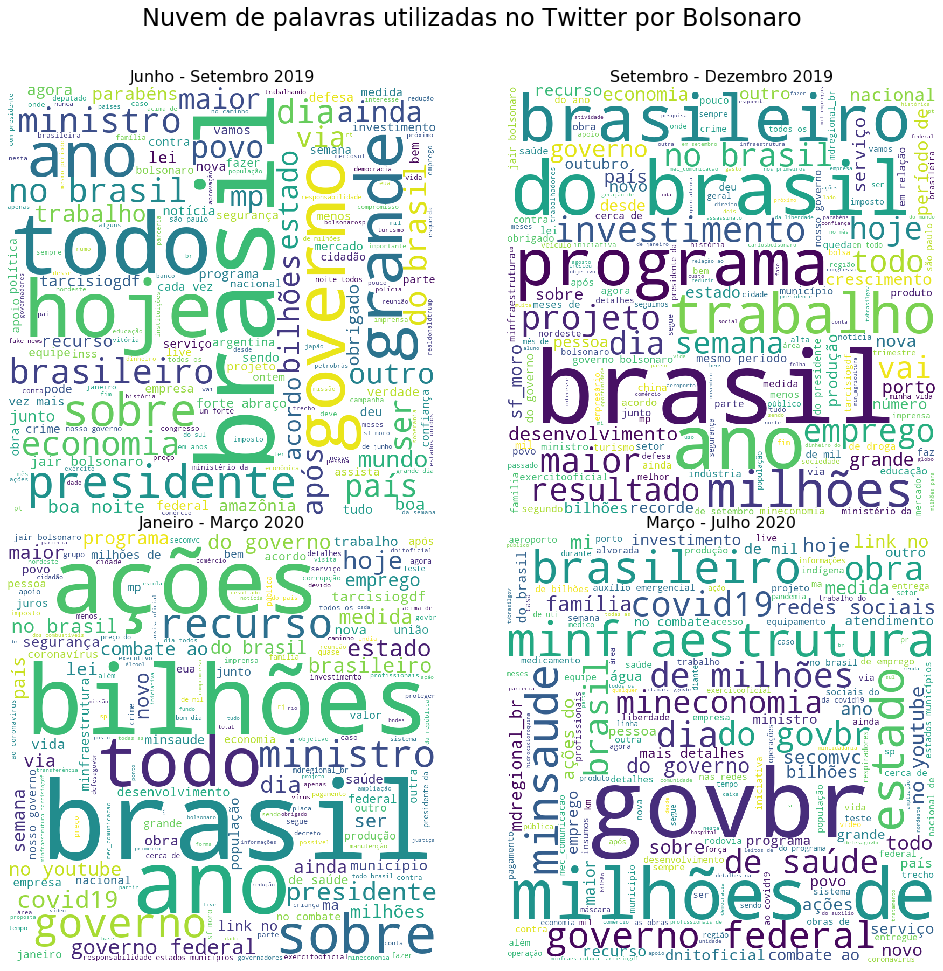

In [12]:
wordcloud1 = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_start_sep) 
wordcloud2 = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_sep_dec)
wordcloud3 = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_jan_mar) 
wordcloud4 = WordCloud(width = 800, height = 800, background_color ='white', 
                      stopwords = stopwords, min_font_size = 10).generate(tweets_apr_end) 
# plot the WordCloud images               
fig = plt.figure(figsize = (14, 14), facecolor = None) 
#fig.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.suptitle("Nuvem de palavras utilizadas no Twitter por Bolsonaro", fontsize=24, y = 0.95)
ax1 = plt.subplot(221)
plt.imshow(wordcloud1)
plt.axis("off") 
ax1.set_title("Junho - Setembro 2019",  fontsize=16)
ax2 = plt.subplot(222)
plt.imshow(wordcloud2) 
plt.axis("off") 
ax2.set_title("Setembro - Dezembro 2019",  fontsize=16)
ax3 = plt.subplot(223)
plt.imshow(wordcloud3)
plt.axis("off") 
ax3.set_title("Janeiro - Março 2020",  fontsize=16)
ax4 = plt.subplot(224)
plt.imshow(wordcloud4) 
plt.axis("off") 
ax4.set_title("Março - Julho 2020",  fontsize=16)
plt.tight_layout(pad = 0.05) 
plt.subplots_adjust(top=0.87)
plt.savefig('..\\images\\wordcloud.pdf', pad_inches = 1)
plt.show() 